# INTRODUCTION

#### This notebook presents initial exploration (mainly descriptive analytics) on the Blue Bikes trip data from January 2019 to June 2019. There are about 774K observations with variables such as Trip Duration, Start Time, Stop Time, Start Station ID/Name/Lat/Long, End Station ID/Name/Lat/Long, Bike ID, User Type, Birth Year and Gender
#### Data source: https://www.bluebikes.com/system-data 

In [12]:
# Import needed libraries and set default formatting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.2,
        color_codes=True, rc={'figure.figsize':(10,6)})
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

In [3]:
path = os.getcwd() + '/'
path

'/Users/macbook/Documents/Academic/Courses/Summer 19/CS602 Python/Homework assignment/HW5/'

In [4]:
# Read each month of data
bluebikes_201901 = pd.read_csv(path + 'bluebikes_201901.csv', sep=',', engine='python')
bluebikes_201902 = pd.read_csv(path + 'bluebikes_201902.csv', sep=',', engine='python')
bluebikes_201903 = pd.read_csv(path + 'bluebikes_201903.csv', sep=',', engine='python')
bluebikes_201904 = pd.read_csv(path + 'bluebikes_201904.csv', sep=',', engine='python')
bluebikes_201905 = pd.read_csv(path + 'bluebikes_201902.csv', sep=',', engine='python')
bluebikes_201906 = pd.read_csv(path + 'bluebikes_201906.csv', sep=',', engine='python')

In [5]:
# Concatenate all months of data
bluebikes_all_months = pd.concat([bluebikes_201901,bluebikes_201902,bluebikes_201903,
           bluebikes_201904,bluebikes_201905,bluebikes_201906])
bluebikes_all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773889 entries, 0 to 274021
Data columns (total 15 columns):
tripduration               773889 non-null int64
starttime                  773889 non-null object
stoptime                   773889 non-null object
start station id           773889 non-null int64
start station name         773889 non-null object
start station latitude     773889 non-null float64
start station longitude    773889 non-null float64
end station id             773889 non-null int64
end station name           773889 non-null object
end station latitude       773889 non-null float64
end station longitude      773889 non-null float64
bikeid                     773889 non-null int64
usertype                   773889 non-null object
birth year                 773889 non-null int64
gender                     773889 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 94.5+ MB


#### We also need to merge the above data with the data set that has info about each station in order to get the number of dock and municipality of each bike station

In [6]:
stations = pd.read_csv(path + 'Hubway_Stations_as_of_July_2017.csv', sep=',', engine='python')
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
Station ID         281 non-null object
Station            281 non-null object
Latitude           281 non-null float64
Longitude          281 non-null float64
Municipality       281 non-null object
publiclyExposed    281 non-null int64
# of Docks         281 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 15.4+ KB


In [7]:
data = pd.merge(bluebikes_all_months, stations, how='inner', left_on='start station name', right_on='Station')

In [8]:
# As there are repeated columns, we're going to delete these
dropped_columns = ['Station ID', 'Latitude', 'Longitude']
data = data.drop(dropped_columns, axis=1)

In [9]:
# Rename each column for naming consistency
data.rename(columns=
            {'tripduration':'trip_duration', 'starttime':'start_time','stoptime':'stop_time',
             'start station id':'start_station_id','start station name':'start_station_name',
             'start station latitude':'start_station_lat','start station longitude':'start_station_lon',
             'end station id':'end_station_id','end station name':'end_station_name',
             'end station latitude':'end_station_lat','end station longitude':'end_station_lon',
             'bikeid':'bike_id','usertype':'user_type','birth year':'birth_year',
             'Station':'station', '# of Docks':'number_of_docks','Municipality':'municipality',
             'publiclyExposed': 'publicly_exposed'},
            inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756042 entries, 0 to 756041
Data columns (total 19 columns):
trip_duration         756042 non-null int64
start_time            756042 non-null object
stop_time             756042 non-null object
start_station_id      756042 non-null int64
start_station_name    756042 non-null object
start_station_lat     756042 non-null float64
start_station_lon     756042 non-null float64
end_station_id        756042 non-null int64
end_station_name      756042 non-null object
end_station_lat       756042 non-null float64
end_station_lon       756042 non-null float64
bike_id               756042 non-null int64
user_type             756042 non-null object
birth_year            756042 non-null int64
gender                756042 non-null int64
station               756042 non-null object
municipality          756042 non-null object
publicly_exposed      756042 non-null int64
number_of_docks       756042 non-null int64
dtypes: float64(4), int64(8), object(7

## Number of stations

In [10]:
len(data.station.unique())

265

## Number of rides made by each type of riders: Customer vs Subscriber

Subscriber    619176
Customer      136866
Name: user_type, dtype: int64

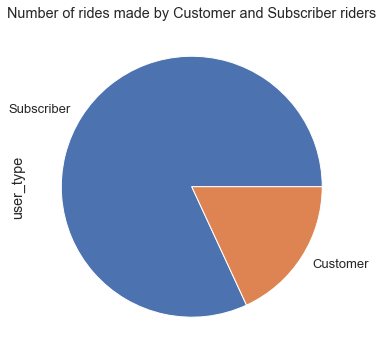

In [13]:
data['user_type'].value_counts().plot.pie().set(
title='Number of rides made by Customer and Subscriber riders')
data['user_type'].value_counts()

## Exploration on trip duration

#### As the trip duration is currently in seconds, we'd better convert it to minutes

In [14]:
data['trip_duration_min'] = (data['trip_duration'] / 60).astype(int)

#### Descriptive stats on trip duration

count    756042.000000
mean         24.479250
std         359.787896
min           1.000000
25%           6.000000
50%          11.000000
75%          19.000000
max       47212.000000
Name: trip_duration_min, dtype: float64

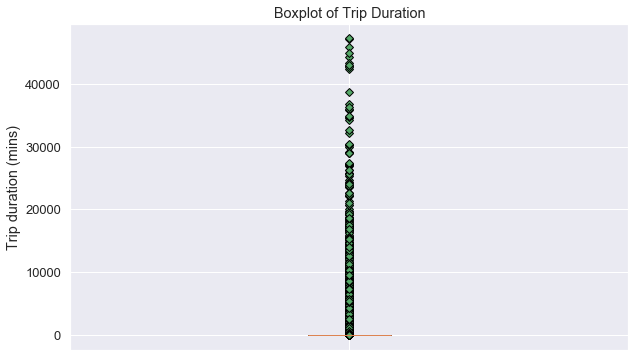

In [15]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig,ax = plt.subplots()
ax.boxplot(data['trip_duration_min'], flierprops=green_diamond)
ax.set(title='Boxplot of Trip Duration', xticklabels='', ylabel='Trip duration (mins)')
data.trip_duration_min.describe()

#### We can see that there are many outliers in the dataset, making it difficult to see the distribution. Let's find out which group of riders has these outliers

## Trip duration with regards to user type

[Text(0, 0.5, 'Trip duration (mins)'),
 Text(0.5, 0, 'User type'),
 Text(0.5, 1.0, 'Boxplot of Trip Duration with regards to Customer/Subscriber')]

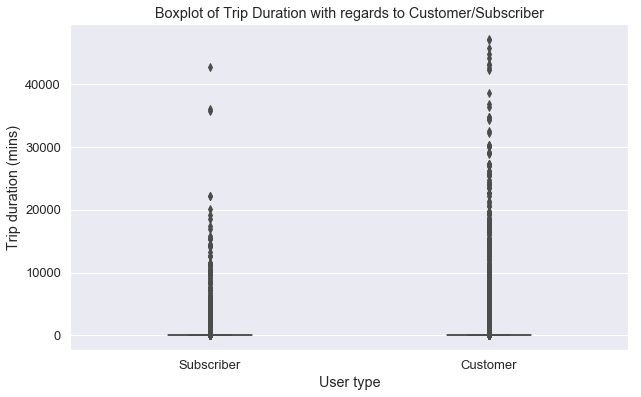

In [16]:
sns.boxplot(data=data, x='user_type', y='trip_duration_min', width=0.3, color='g').set(
title='Boxplot of Trip Duration with regards to Customer/Subscriber',
xlabel='User type', ylabel='Trip duration (mins)')

#### There are actually outliers in both group of riders, so we may want to filter out outliers with regards to each type of rider. To filter those outliers, however, we need to choose a threshold. From the info on Blue Bikes's website, a trip for Customers can be either Single Ride (30mins) or Adventure Pass (120 mins), whereas for Annual/Monthly Subscribers it is 45 mins. So we can pick 120 mins as the threshold for Customers, and 45 mins for Subscribers
##### Blue Bikes website: https://www.bluebikes.com/pricing

In [17]:
# Filter outliers with regards to each type of riders
data_customer = data[
    (data['user_type'] == 'Customer') &
    (data['trip_duration_min'] <= 120)
]
data_subscriber = data[
    (data['user_type'] == 'Subscriber') &
    (data['trip_duration_min'] <= 45)
]
data_no_outliers = pd.concat([data_customer,data_subscriber])

#### Let's see the boxplot distribution for Trip duration again

[Text(0, 0.5, 'Trip duration (mins)'),
 Text(0.5, 0, 'User type'),
 Text(0.5, 1.0, 'Boxplot of Trip Duration with regards to Customer/Subscriber (Outliers filtered out)')]

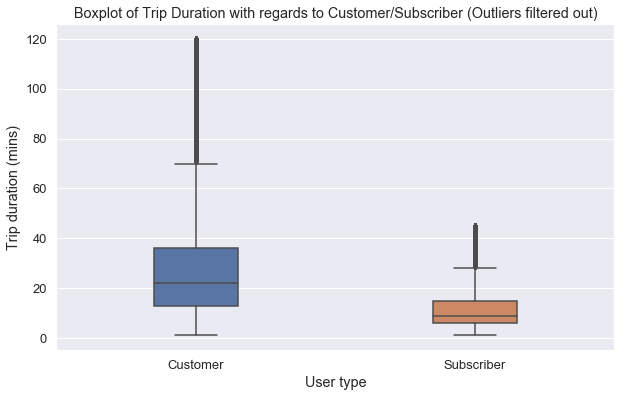

In [18]:
sns.boxplot(data=data_no_outliers, x='user_type', y='trip_duration_min',
           width=0.3, fliersize=4).set(
title='Boxplot of Trip Duration with regards to Customer/Subscriber (Outliers filtered out)',
xlabel='User type', ylabel='Trip duration (mins)')

#### Now it's easier to see that the trip duration is different for each group of riders. The median tells us that the duration for Customer riders are about 20 mins whereas it's 10 mins for Subscriber riders. Also, looking at the length of the box, we can see that for Customer riders, the length of a trip is much more varied than that for Subscriber

#### How about the age of a rider? Is trip duration also different with regards to this variable? 

## Trip duration with regards to the age of riders

#### Let's first see the descriptive stats on the variable Age 

In [19]:
# As we don't have the varible Age yet, we need to calculate that
data_no_outliers['age'] = 2019 - data_no_outliers['birth_year'].astype(int)
data_no_outliers.age.describe()

count    745862.000000
mean         35.083149
std          11.538941
min          16.000000
25%          26.000000
50%          31.000000
75%          43.000000
max         133.000000
Name: age, dtype: float64

#### It looks so absurd that some riders are still able to ride a bike even though they're around 100 years old! (max=133) The reason could be that this field is self-reported by the rider so it will not make much sense to do detailed analysis on this variable

#### We can probably look at Trip duration with regards to weekday

## Trip duration with regards to weekday

#### There's no weekday variable in the data set so we need to figure out how to get this variable

In [23]:
data_no_outliers['start_date'] = pd.to_datetime(data_no_outliers['start_time'].apply(lambda x : x[:10]))
data_no_outliers['weekday'] = data_no_outliers['start_date'].dt.day_name()
data_no_outliers.weekday.head()

19       Tuesday
20       Tuesday
54     Wednesday
186     Thursday
240       Friday
Name: weekday, dtype: object

#### Now we can see how trip duration is different with regards to weekday

[Text(0, 0.5, 'Trip duration (mins)'),
 Text(0.5, 0, 'Weekday'),
 Text(0.5, 1.0, 'Boxplot of Trip duration with regards to Weekday')]

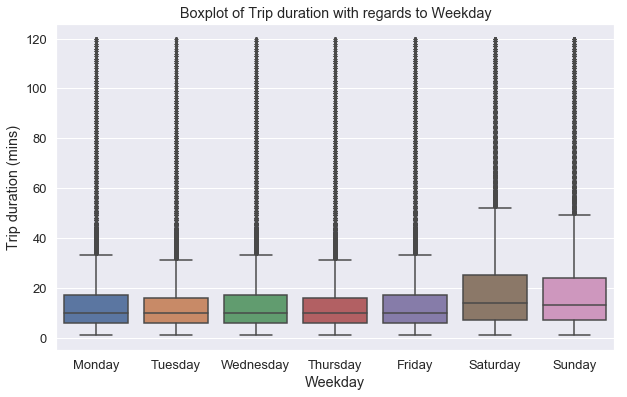

In [24]:
sns.boxplot(data=data_no_outliers, x='weekday', y='trip_duration_min', saturation=0.7, fliersize=3,
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).set(
           title='Boxplot of Trip duration with regards to Weekday',
           ylabel='Trip duration (mins)', xlabel='Weekday')

#### The distribution is pretty as much as we expect, with riders taking a little longer trip during weekends. However, is this pattern similar for each group of riders? 

[Text(0, 0.5, 'Trip duration (mins)'),
 Text(0.5, 0, 'Weekday'),
 Text(0.5, 1.0, 'Boxplot of Trip duration with regards to Weekday')]

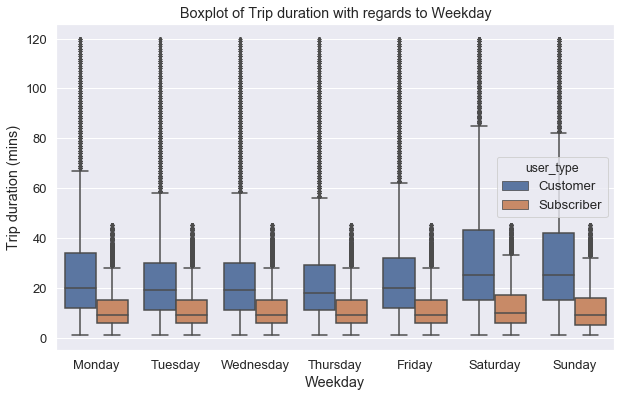

In [25]:
sns.boxplot(data=data_no_outliers, x='weekday', y='trip_duration_min', hue='user_type',
            saturation=0.7, fliersize=3,
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).set(
           title='Boxplot of Trip duration with regards to Weekday',
           ylabel='Trip duration (mins)', xlabel='Weekday')

#### There's definitely a little difference in the behaviors between Customers and Subscribers. Trip duration for Subscribers actually seem to stay the same throughout the week, whereas for Customers, trip duration tends to be longer during weekends 

## Station Popularity

#### Let's see which stations are most popular as a start station (i.e. stations where most riders unlock a bike)

##### (Note: As this part of analysis is independent of the Trip duration variable, we're going to use the original dataset instead of the filtered one)

In [26]:
data.groupby(by='start_station_name').size().sort_values(ascending=False).head(10)

start_station_name
MIT at Mass Ave / Amherst St                        21181
MIT Stata Center at Vassar St / Main St             18371
Central Square at Mass Ave / Essex St               16908
South Station - 700 Atlantic Ave                    15013
Kendall T                                           13466
MIT Pacific St at Purrington St                     12868
Nashua Street at Red Auerbach Way                   11177
Harvard Square at Mass Ave/ Dunster                 11052
One Kendall Square at Hampshire St / Portland St    10544
MIT Vassar St                                        9972
dtype: int64

#### Looks like the stations where most people depart are in the area of Cambridge. How about the stations which are the most frequented as an end station?

In [27]:
data.groupby(by='end_station_name').size().sort_values(ascending=False).head(10)

end_station_name
MIT Stata Center at Vassar St / Main St                        19932
MIT at Mass Ave / Amherst St                                   18849
Central Square at Mass Ave / Essex St                          16858
Nashua Street at Red Auerbach Way                              16561
South Station - 700 Atlantic Ave                               14990
MIT Pacific St at Purrington St                                11454
Kendall T                                                      11328
Harvard Square at Mass Ave/ Dunster                            11055
MIT Vassar St                                                   9373
Christian Science Plaza - Massachusetts Ave at Westland Ave     9260
dtype: int64

#### Cambridge is at the top again, with many stations frequented by riders as end point

#### Let's have a look at the number of docks at all stations

## Number of docks at a station

[Text(0.5, 0, 'Number of docks'),
 Text(0.5, 1.0, 'Boxplot: Number of docks at stations')]

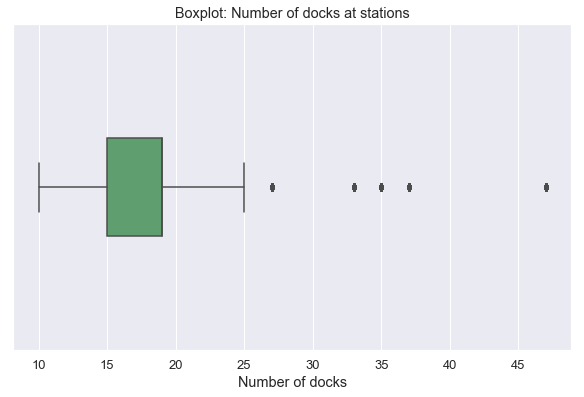

In [28]:
sns.boxplot(data['number_of_docks'], color='g', width=0.3).set(
    title='Boxplot: Number of docks at stations',
xlabel='Number of docks')

#### In general, there are 10 to 25 docks at each station, however, there are stations with significantly more docks. Let's see if these stations are in Cambridge (or unexpectly any other areas)

In [29]:
groupby_stations = data.groupby('station').mean()
above_25_docks_stations = groupby_stations[groupby_stations['number_of_docks'] > 25]
above_25_docks_stations['number_of_docks'].astype(int).sort_values(ascending=False).head(10)

station
South Station - 700 Atlantic Ave                       47
Nashua Street at Red Auerbach Way                      37
TD Garden - West End Park                              35
Maverick Square - Lewis Mall                           33
Copley Square - Dartmouth St at Boylston St            33
Packard's Corner - Commonwealth Ave at Brighton Ave    27
Newbury St at Hereford St                              27
MIT at Mass Ave / Amherst St                           27
MIT Stata Center at Vassar St / Main St                27
Name: number_of_docks, dtype: int64

#### Interestingly, even though Cambridge is the most popular area where people start and end their rides, the stations with the most number of docks are NOT in this area. However, it completely makes sense for South Station and TD Garden to have the most number of docks

#### Let's see how many docks there are in general at the bike stations in the Cambridge area

[Text(0, 0.5, 'Proportion of stations'),
 Text(0.5, 0, 'Number of docks at a station'),
 Text(0.5, 1.0, 'Number of docks at Cambridge stations')]

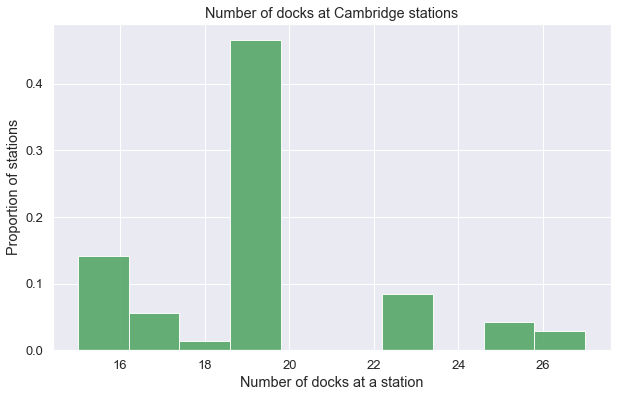

In [30]:
stations_in_Cambridge = data[data['municipality'] == 'Cambridge'].groupby('station').mean()
stations_in_Cambridge['number_of_docks'].plot.hist(density=True, grid=True, color='g', alpha=0.9).set(
    title = 'Number of docks at Cambridge stations',
    xlabel='Number of docks at a station', ylabel='Proportion of stations')

#### It seems that about half of stations in the Cambridge area each have 18-19 docks, and just a very small proportion of them have more than 25 docks

## Unavailability of bikes/vacant docks at a station

#### Meeting the demand for bicycles and vacant docks is a particularly challenging problem for bike sharing programs due to inherent imbalances in the renting and return rates at the various stations. After examining the overall popularity of a station, we may also want to see if a station experiences problems such as bike shortage or dock overload. While the first situation refers to the lack of available bikes at a station (i.e. no bike to take out), the second one happens when all the docks are occupied (i.e. no vacant dock to return a bike to). Both the situations cause inconvenience to riders; they either have to wait at that station or end up navigating to another station to get the desired service (available bike/vacant dock)

#### We will examine if a station has one of these two problems by calculating the net bikes at a station

#### Net number of bikes = (number of bikes in - number of bikes out) on an average hour

#### If net number of bikes > 0, a station is probably full of bikes, i.e. there's no vacant dock. On the other hand, if net number of docks < 0, there's no available bike at a station

In [31]:
# We need to get the date and the hour when a bike is unlocked
data['start_hour'] = data['start_time'].apply(lambda x : x[11:13])
data.start_hour.head()
data['start_date'] = data['start_time'].apply(lambda x : x[:10])
data.start_date.head()

0    2019-01-01
1    2019-01-01
2    2019-01-01
3    2019-01-01
4    2019-01-01
Name: start_date, dtype: object

In [32]:
# Then we can calculate number of bikes taken out at a station, on a single date, at a single hour
bikes_out = data.groupby(by=['start_station_name','start_date','start_hour'])['bike_id'].count()
bikes_out = bikes_out.reset_index()
bikes_out.rename(columns={'bike_id':'number_bikes_out'}, inplace=True)
bikes_out.head()

,start_station_name,start_date,start_hour,number_bikes_out
0,175 N Harvard St,2019-01-01,12,1
1,175 N Harvard St,2019-01-01,13,2
2,175 N Harvard St,2019-01-01,15,4
3,175 N Harvard St,2019-01-01,21,1
4,175 N Harvard St,2019-01-02,02,1


In [33]:
# Next, calculate the AVERAGE number of bikes taken out at a station at EACH hour
bikes_out_by_hour = bikes_out.groupby(by=['start_station_name','start_hour'])['number_bikes_out'].mean()
bikes_out_by_hour = bikes_out_by_hour.reset_index()
bikes_out_by_hour.head()

,start_station_name,start_hour,number_bikes_out
0,175 N Harvard St,00,1.111111
1,175 N Harvard St,01,1.571429
2,175 N Harvard St,02,1.166667
3,175 N Harvard St,03,1.250000
4,175 N Harvard St,04,1.500000


In [34]:
# Finally, we can get the AVERAGE number of bikes taken out at a station
hourly_number_bikes_out = bikes_out_by_hour.groupby('start_station_name')['number_bikes_out'].mean()
hourly_number_bikes_out.sort_values(ascending=False).head()

start_station_name
MIT at Mass Ave / Amherst St               6.496084
MIT Stata Center at Vassar St / Main St    5.876062
South Station - 700 Atlantic Ave           5.392942
Central Square at Mass Ave / Essex St      5.316779
Nashua Street at Red Auerbach Way          4.690549
Name: number_bikes_out, dtype: float64

#### We are going to repeat the above steps, but instead of figuring out the number of bikes taken out, we're calculating the number of bikes put back into a dock

In [35]:
data['stop_hour'] = data['stop_time'].apply(lambda x : x[11:13])
data.stop_hour.head()
data['stop_date'] = data['stop_time'].apply(lambda x : x[:10])
data.stop_date.head()

0    2019-01-01
1    2019-01-01
2    2019-01-01
3    2019-01-01
4    2019-01-01
Name: stop_date, dtype: object

In [36]:
bikes_in = data.groupby(by=['end_station_name','stop_date','stop_hour'])['bike_id'].count()
bikes_in = bikes_in.reset_index()
bikes_in.rename(columns={'bike_id':'number_bikes_in'}, inplace=True)
bikes_in.head()

,end_station_name,stop_date,stop_hour,number_bikes_in
0,175 N Harvard St,2019-01-01,12,2
1,175 N Harvard St,2019-01-01,19,1
2,175 N Harvard St,2019-01-02,02,1
3,175 N Harvard St,2019-01-02,06,1
4,175 N Harvard St,2019-01-02,07,1


In [37]:
bikes_in_by_hour = bikes_in.groupby(by=['end_station_name','stop_hour'])['number_bikes_in'].mean()
bikes_in_by_hour = bikes_in_by_hour.reset_index()
bikes_in_by_hour.head()

,end_station_name,stop_hour,number_bikes_in
0,175 N Harvard St,00,1.380952
1,175 N Harvard St,01,1.214286
2,175 N Harvard St,02,1.375000
3,175 N Harvard St,03,1.666667
4,175 N Harvard St,04,1.000000


In [38]:
hourly_number_bikes_in = bikes_in_by_hour.groupby('end_station_name')['number_bikes_in'].mean()
hourly_number_bikes_in.sort_values(ascending=False).head()

end_station_name
MIT Stata Center at Vassar St / Main St    6.386461
MIT at Mass Ave / Amherst St               5.883798
Nashua Street at Red Auerbach Way          5.860210
Central Square at Mass Ave / Essex St      5.306484
South Station - 700 Atlantic Ave           5.292352
Name: number_bikes_in, dtype: float64

#### Now we can compare number of bikes in and number of bikes out at a station within one hour

In [39]:
hourly_number_bikes_in_out = pd.merge(hourly_number_bikes_in, hourly_number_bikes_out, left_index=True, right_index=True)
hourly_number_bikes_in_out['net_bikes']=hourly_number_bikes_in_out.number_bikes_in - hourly_number_bikes_in_out.number_bikes_out

In [40]:
hourly_number_bikes_in_out.sort_values(by='net_bikes', ascending=True).head(10)

,number_bikes_in,number_bikes_out,net_bikes
One Kendall Square at Hampshire St / Portland St,3.261335,3.877567,-0.616232
TD Garden - West End Park,2.526361,3.141297,-0.614936
MIT at Mass Ave / Amherst St,5.883798,6.496084,-0.612285
Beacon St at Massachusetts Ave,4.244582,4.661278,-0.416696
Kendall T,4.094604,4.506062,-0.411459
MIT Pacific St at Purrington St,3.783106,4.139574,-0.356467
359 Broadway - Broadway at Fayette Street,2.140435,2.452123,-0.311688
Mattapan Library,1.229167,1.537037,-0.307870
Archdale Rd at Washington St,1.713355,2.008253,-0.294898
Inman Square at Vellucci Plaza / Hampshire St,1.895427,2.177757,-0.282330


#### We can see that the stations that are more likely to experience a lack of bikes are around MIT Kendal Sq


## Distance traveled

#### Note: We're going to calculate the distance traveled by riders using two coordinate points in the data (i.e. start station latitude/longitude, end station latitude/longitude). However, as in many cases, riders unlock and return a bike at a same station (i.e. the start station and end station have the same latitude/longitude coordinates), so the results may contain many 0

In [42]:
import math
def distance(lat1, lon1, lat2, lon2):
    # Function to calculate distance between two points using lat/long coordinates
    radius = 7917.5 # mile
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

data['distance'] = data.apply(lambda row: round(distance(
    row['start_station_lat'], row['start_station_lon'], row['end_station_lat'], row['end_station_lon']), 1),
                             axis=1)

data.distance.head()

0    1.6
1    1.6
2    1.1
3    0.6
4    0.6
Name: distance, dtype: float64

#### Let's see how many rides in which a person unlocks and returns a bike at a same station

In [43]:
data.distance[data['distance'] == 0].count()

26797

#### And where are these trips with 0-mile distance?

[Text(0.5, 1.0, 'Municipalities with 0-mile distance')]

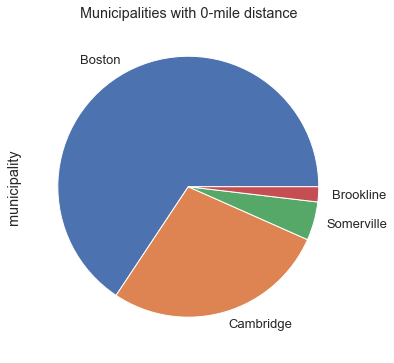

In [44]:
data.municipality[data['distance'] == 0].value_counts().plot.pie().set(
title='Municipalities with 0-mile distance')

#### So Boston and Cambridge are where people tend to do a round trip

#### Let's see the distribution of the distance variable

count    756042.000000
mean          2.399981
std           1.678836
min           0.000000
25%           1.200000
50%           2.000000
75%           3.200000
max          15.700000
Name: distance, dtype: float64

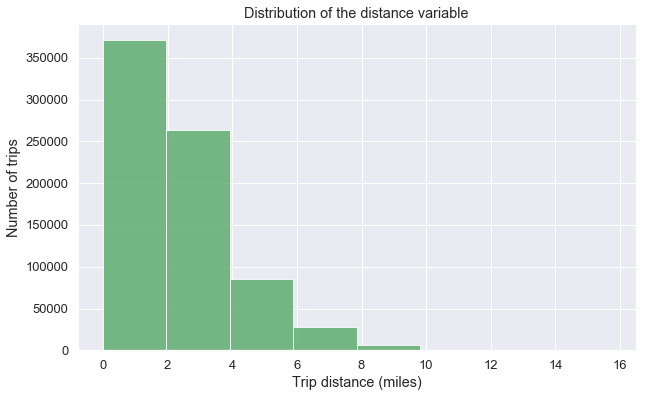

In [45]:
data.distance.plot.hist(bins=8,density=False, color='g', alpha=0.8, fontsize=13).set(
    title='Distribution of the distance variable',
    xlabel='Trip distance (miles)', ylabel='Number of trips')
data.distance.describe()

#### So most of the trips are under 3.2 miles

#### Let's see if the trip distance is different for Customer riders vs Subscriber riders

In [46]:
# Create distance intervals
data['distance_bins'] = pd.cut(data.distance, bins=[0.5,2,3.5,5,15.7],
       labels=(['0.5 - 2','2 - 3.5','3.5 - 5','More than 5']), right=True)
data.distance_bins.head()

0    0.5 - 2
1    0.5 - 2
2    0.5 - 2
3    0.5 - 2
4    0.5 - 2
Name: distance_bins, dtype: category
Categories (4, object): [0.5 - 2 < 2 - 3.5 < 3.5 - 5 < More than 5]

[Text(0, 0.5, 'Distance (miles)'),
 Text(0.5, 0, 'Percentage of riders'),
 Text(0.5, 1.0, 'Difference in trip distance between Customer and Subscriber riders')]

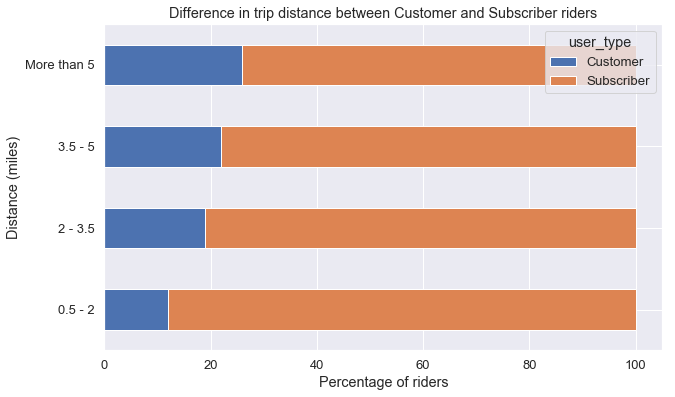

In [47]:
crosstab_between_distance_and_usertype = pd.crosstab(
    index=data.distance_bins, columns=data.user_type).apply(
    lambda x: round((x/x.sum()),2) * 100, axis=1)
crosstab_between_distance_and_usertype.plot(kind='barh', stacked=True, width=0.5, fontsize=13).set(
    title='Difference in trip distance between Customer and Subscriber riders',
    ylabel='Distance (miles)', xlabel='Percentage of riders')

#### It is pretty clear that as the distance increases, there's an increase in the number of rides made by Customer riders

# SUMMARY

#### In conclusion, about 75% of rides from January 2019 to June 2019 are made by subscriber riders. However, subscribers’ trips tend to be shorter than that of customers (10 minutes vs 20 minutes). Moreover, trip duration for subscribers actually seem to be similar throughout the week, whereas for customers, it tends to be longer during weekends.


#### In terms of bike stations, we’ve seen that the most popular ones are around MIT, Cambridge. However, these stations are not necessarily the ones with the most number of docks. Also, the analysis on the number of bikes unlocked from/returned to a station indicates that some stations might experience the issue of unavailability of bikes or vacant docks.


#### Lastly, regarding distance traveled, about 3.6% of all the trips (27000 out of 756000) are round trips (i.e. trips in which riders unlock and return a bike at a same station). And again, we see another difference in distance between the two categories of riders. Particularly, as the distance increases, there's also an increase in the number of rides made by customers.
